Pair Trading Strategy

Culminating Project

By: Tin Hang

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
symbols = ['JACK', 'MCD', 'WING', 'WEN', 'LOCO', 'SONC', 'TACO', 'DPZ']

In [3]:
start = '2017-01-01' 
end = '2018-01-01'

In [4]:
data = pdr.get_data_yahoo(symbols, start, end)['Adj Close']

[*********************100%***********************]  8 of 8 downloaded


In [5]:
data.head(10)

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
Date,,,,,,,,
2017-01-03,156.133087,105.223282,12.70,114.436089,25.054655,14.32,12.969169,27.345259
2017-01-04,160.697998,105.786285,13.10,114.302147,25.160292,14.55,13.172114,27.465435
2017-01-05,160.481064,104.941780,12.85,114.512611,26.456715,14.57,13.181778,26.679659
2017-01-06,161.190964,103.165413,12.50,115.526672,26.293459,14.02,12.804880,26.134230
2017-01-09,162.196594,104.718521,12.35,115.210976,26.408697,13.79,12.978832,26.365341
2017-01-10,164.020584,106.766685,12.70,115.038788,25.909334,13.69,13.046482,26.402321
2017-01-11,166.584045,106.174553,12.75,115.641472,26.091797,13.87,13.181778,26.762857
2017-01-12,165.992477,105.795998,12.50,116.808609,25.525209,14.04,13.336403,26.735123
2017-01-13,164.809341,104.767067,12.45,116.234612,25.381161,14.01,13.423380,26.679659


In [6]:
data.columns

Index(['DPZ', 'JACK', 'LOCO', 'MCD', 'SONC', 'TACO', 'WEN', 'WING'], dtype='object')

In [7]:
data.describe()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,187.280779,98.814505,12.170020,144.211327,25.006098,13.274582,14.462710,29.367584
std,13.494815,4.414136,1.196647,17.043870,1.751990,0.973078,0.956475,3.781175
min,156.133087,89.898476,9.650000,114.302147,21.735884,11.740000,12.773648,23.259186
25%,179.266197,95.290069,11.450000,124.905792,23.690658,12.520000,13.426369,26.610321
50%,184.678558,98.966385,12.150000,149.234207,24.595613,13.110000,14.723282,28.260468
75%,194.245560,102.200688,13.075000,155.845795,26.216793,13.820000,15.186722,31.113525
max,216.823730,108.640137,14.400000,170.945053,28.898996,15.910000,16.330280,39.735847


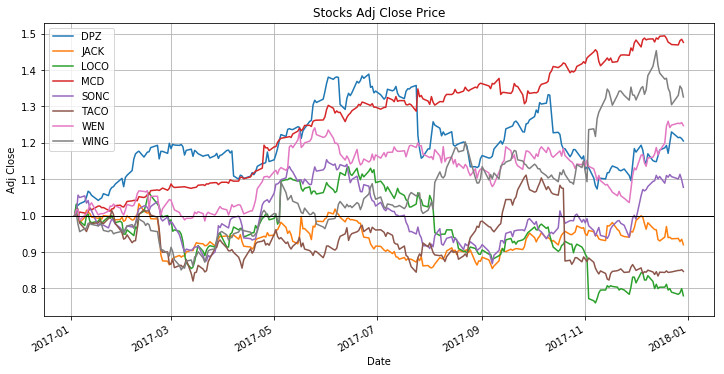

In [8]:
#for symbol in symbols:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = data.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()

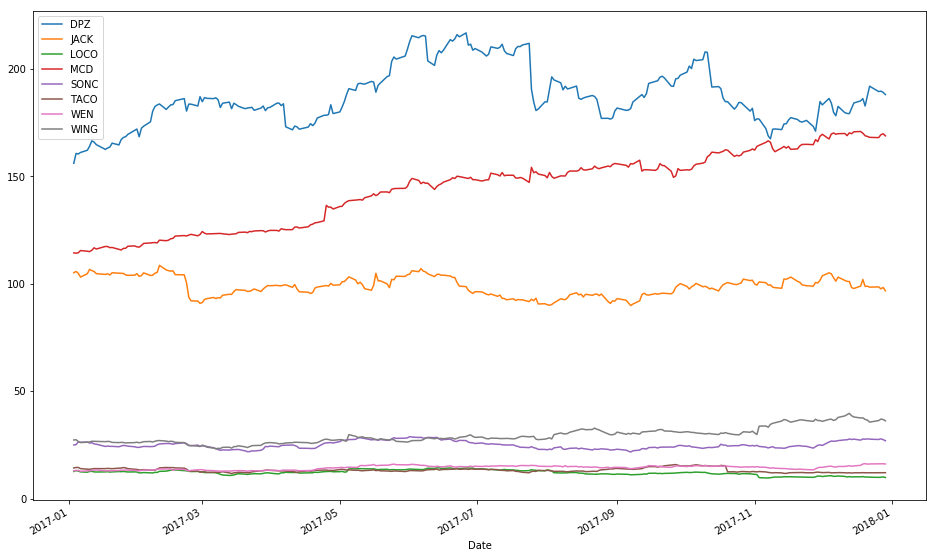

In [9]:
data.plot(figsize=(16,10))

In [10]:
# ['JACK', 'MCD', 'WING', 'WEN', 'LOCO', 'SONC', 'TACO', 'DPZ']
corr_rest = data.corr()
corr_rest

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
DPZ,1.000000,-0.177830,0.529861,0.323936,0.359472,0.166470,0.662502,-0.035356
JACK,-0.177830,1.000000,0.113475,-0.222812,0.561154,0.119632,-0.119355,0.014036
LOCO,0.529861,0.113475,1.000000,-0.409517,0.376515,0.361454,0.147109,-0.623277
MCD,0.323936,-0.222812,-0.409517,1.000000,0.123659,-0.164916,0.737902,0.852372
SONC,0.359472,0.561154,0.376515,0.123659,1.000000,-0.054906,0.476119,0.139746
TACO,0.166470,0.119632,0.361454,-0.164916,-0.054906,1.000000,0.055567,-0.210342
WEN,0.662502,-0.119355,0.147109,0.737902,0.476119,0.055567,1.000000,0.490340
WING,-0.035356,0.014036,-0.623277,0.852372,0.139746,-0.210342,0.490340,1.000000


In [11]:
pair_value = corr_rest.abs().unstack()
pair_value.sort_values(ascending = False)

WING  WING    1.000000
WEN   WEN     1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
SONC  SONC    1.000000
TACO  TACO    1.000000
DPZ   DPZ     1.000000
WING  MCD     0.852372
MCD   WING    0.852372
WEN   MCD     0.737902
MCD   WEN     0.737902
DPZ   WEN     0.662502
WEN   DPZ     0.662502
LOCO  WING    0.623277
WING  LOCO    0.623277
JACK  SONC    0.561154
SONC  JACK    0.561154
DPZ   LOCO    0.529861
LOCO  DPZ     0.529861
WEN   WING    0.490340
WING  WEN     0.490340
SONC  WEN     0.476119
WEN   SONC    0.476119
LOCO  MCD     0.409517
MCD   LOCO    0.409517
LOCO  SONC    0.376515
SONC  LOCO    0.376515
LOCO  TACO    0.361454
TACO  LOCO    0.361454
                ...   
MCD   JACK    0.222812
JACK  MCD     0.222812
TACO  WING    0.210342
WING  TACO    0.210342
DPZ   JACK    0.177830
JACK  DPZ     0.177830
DPZ   TACO    0.166470
TACO  DPZ     0.166470
      MCD     0.164916
MCD   TACO    0.164916
LOCO  WEN     0.147109
WEN   LOCO    0.147109
SONC  WING 

In [12]:
corr_rest['JACK'].sort_values(ascending=False)

JACK    1.000000
SONC    0.561154
TACO    0.119632
LOCO    0.113475
WING    0.014036
WEN    -0.119355
DPZ    -0.177830
MCD    -0.222812
Name: JACK, dtype: float64

In [13]:
corr_rest['MCD'].sort_values(ascending=False)

MCD     1.000000
WING    0.852372
WEN     0.737902
DPZ     0.323936
SONC    0.123659
TACO   -0.164916
JACK   -0.222812
LOCO   -0.409517
Name: MCD, dtype: float64

In [14]:
corr_rest['WING'].sort_values(ascending=False)

WING    1.000000
MCD     0.852372
WEN     0.490340
SONC    0.139746
JACK    0.014036
DPZ    -0.035356
TACO   -0.210342
LOCO   -0.623277
Name: WING, dtype: float64

In [15]:
corr_rest['WEN'].sort_values(ascending=False)

WEN     1.000000
MCD     0.737902
DPZ     0.662502
WING    0.490340
SONC    0.476119
LOCO    0.147109
TACO    0.055567
JACK   -0.119355
Name: WEN, dtype: float64

In [16]:
corr_rest['LOCO'].sort_values(ascending=False)

LOCO    1.000000
DPZ     0.529861
SONC    0.376515
TACO    0.361454
WEN     0.147109
JACK    0.113475
MCD    -0.409517
WING   -0.623277
Name: LOCO, dtype: float64

In [17]:
corr_rest['SONC'].sort_values(ascending=False)

SONC    1.000000
JACK    0.561154
WEN     0.476119
LOCO    0.376515
DPZ     0.359472
WING    0.139746
MCD     0.123659
TACO   -0.054906
Name: SONC, dtype: float64

In [18]:
corr_rest['TACO'].sort_values(ascending=False)

TACO    1.000000
LOCO    0.361454
DPZ     0.166470
JACK    0.119632
WEN     0.055567
SONC   -0.054906
MCD    -0.164916
WING   -0.210342
Name: TACO, dtype: float64

In [19]:
corr_rest['DPZ'].sort_values(ascending=False)

DPZ     1.000000
WEN     0.662502
LOCO    0.529861
SONC    0.359472
MCD     0.323936
TACO    0.166470
WING   -0.035356
JACK   -0.177830
Name: DPZ, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C62C555BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C62CE32438>]], dtype=object)

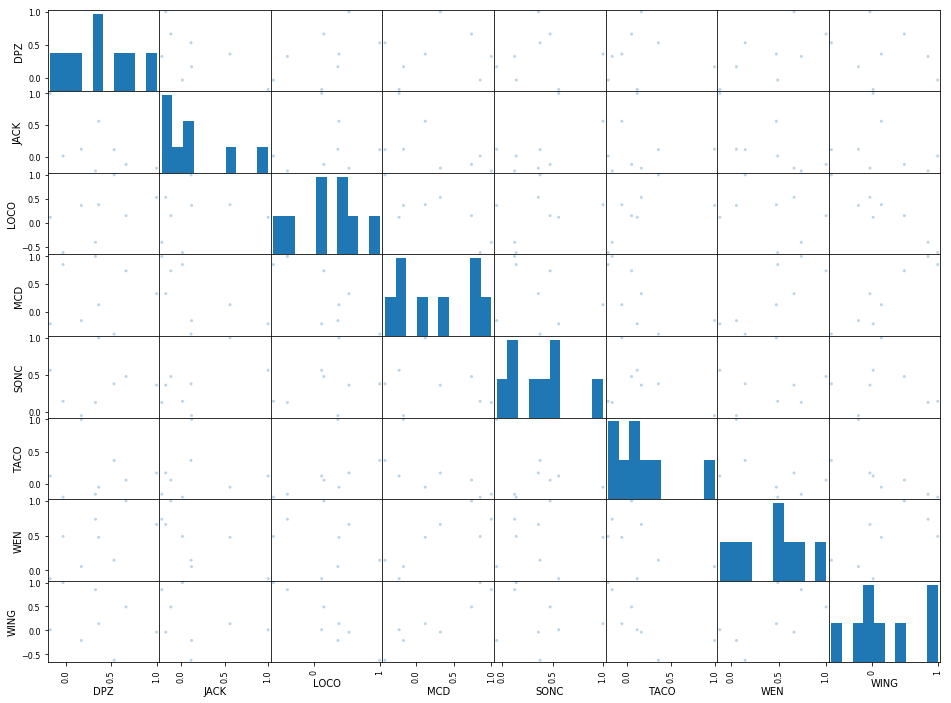

In [20]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(corr_rest, figsize=(16,12), alpha=0.3)

In [21]:
# Returns
for symbol in symbols:
    returns = data.pct_change()
returns.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
Date,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.029237,0.005351,0.031496,-0.001170,0.004216,0.016061,0.015648,0.004395
2017-01-05,-0.001350,-0.007983,-0.019084,0.001841,0.051527,0.001375,0.000734,-0.028610
2017-01-06,0.004424,-0.016927,-0.027237,0.008855,-0.006171,-0.037749,-0.028592,-0.020444
2017-01-09,0.006239,0.015055,-0.012000,-0.002733,0.004383,-0.016405,0.013585,0.008843


In [22]:
returns = returns.dropna()

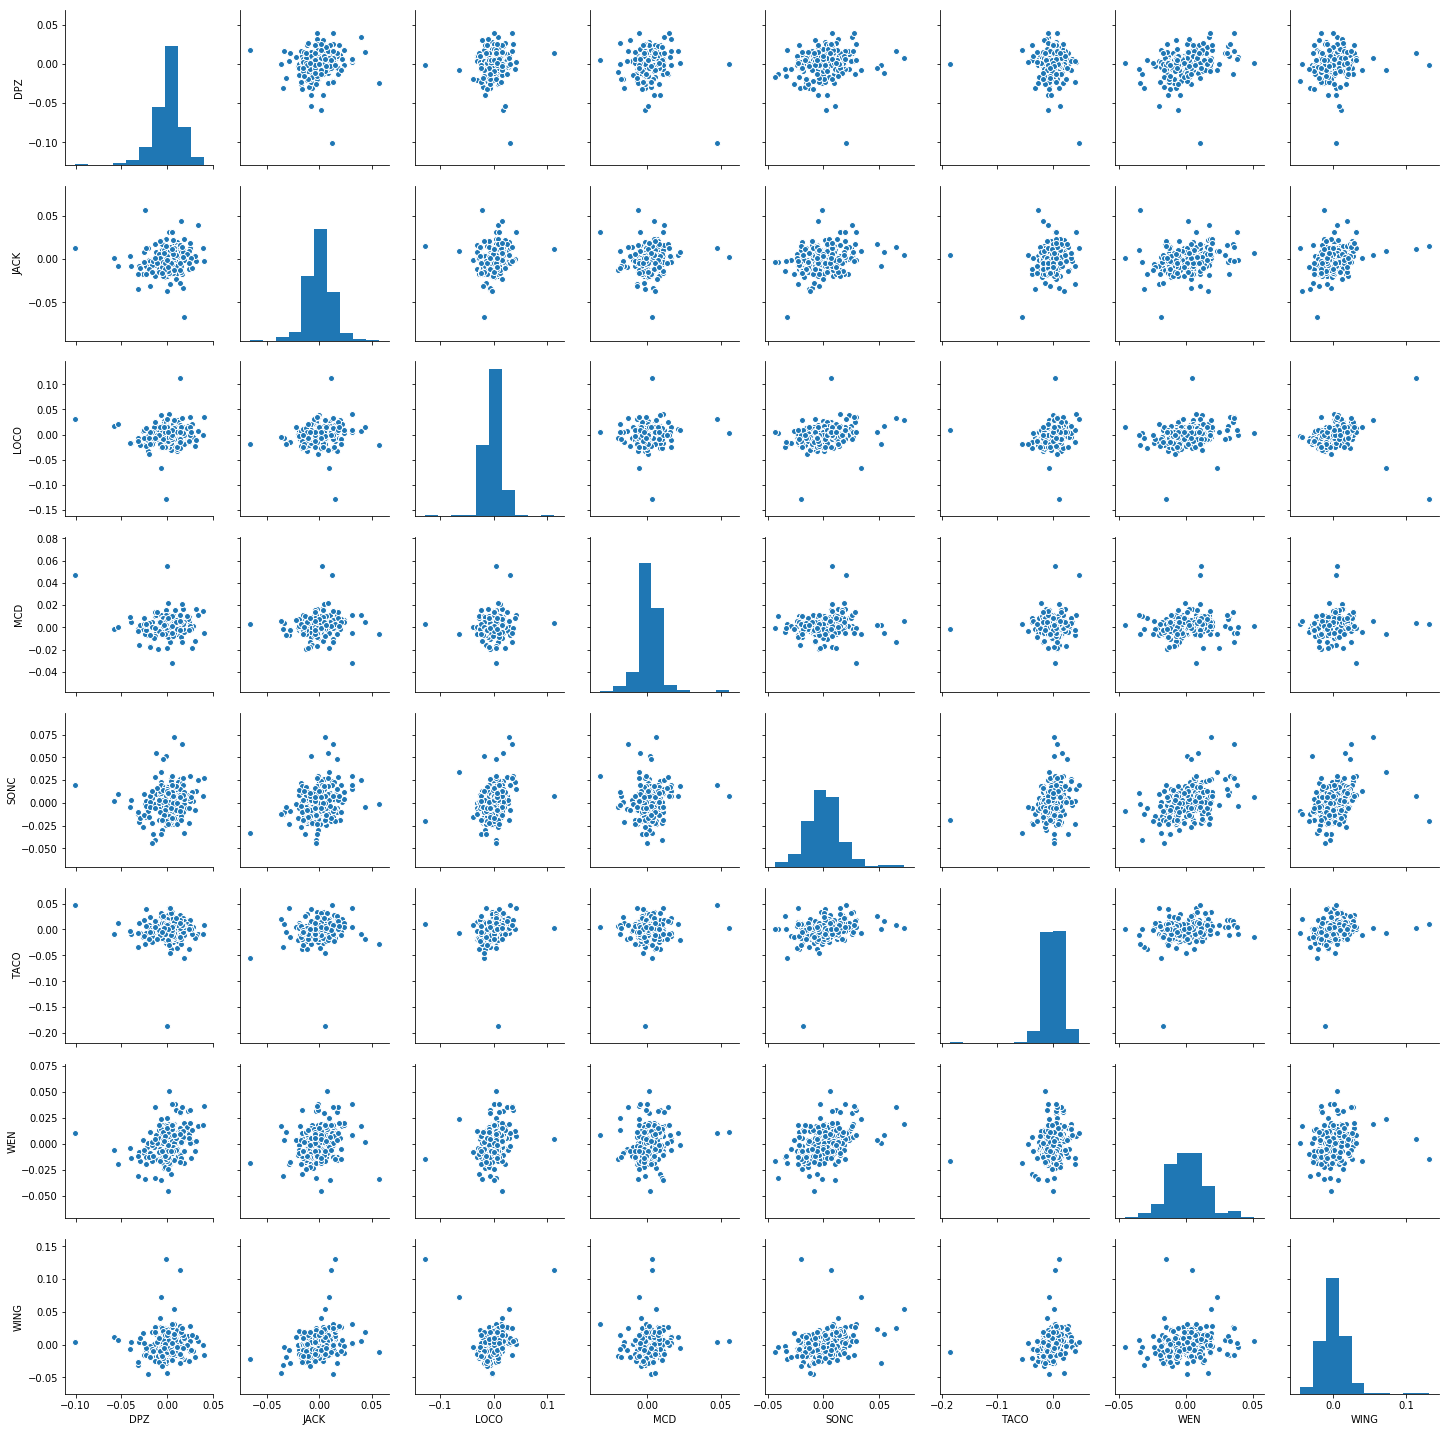

In [23]:
sns.pairplot(returns[1:])

In [24]:
# Worst Single Day Returns
returns.idxmin()

DPZ    2017-07-25
JACK   2017-02-23
LOCO   2017-11-03
MCD    2017-09-12
SONC   2017-08-08
TACO   2017-10-20
WEN    2017-02-16
WING   2017-07-27
dtype: datetime64[ns]

In [25]:
# Best Single Day Gain
returns.idxmax()

DPZ    2017-11-29
JACK   2017-05-17
LOCO   2017-05-05
MCD    2017-04-25
SONC   2017-04-24
TACO   2017-07-25
WEN    2017-05-10
WING   2017-11-03
dtype: datetime64[ns]

In [26]:
returns.std()

DPZ     0.015524
JACK    0.013141
LOCO    0.018425
MCD     0.008183
SONC    0.016079
TACO    0.019280
WEN     0.014068
WING    0.018756
dtype: float64

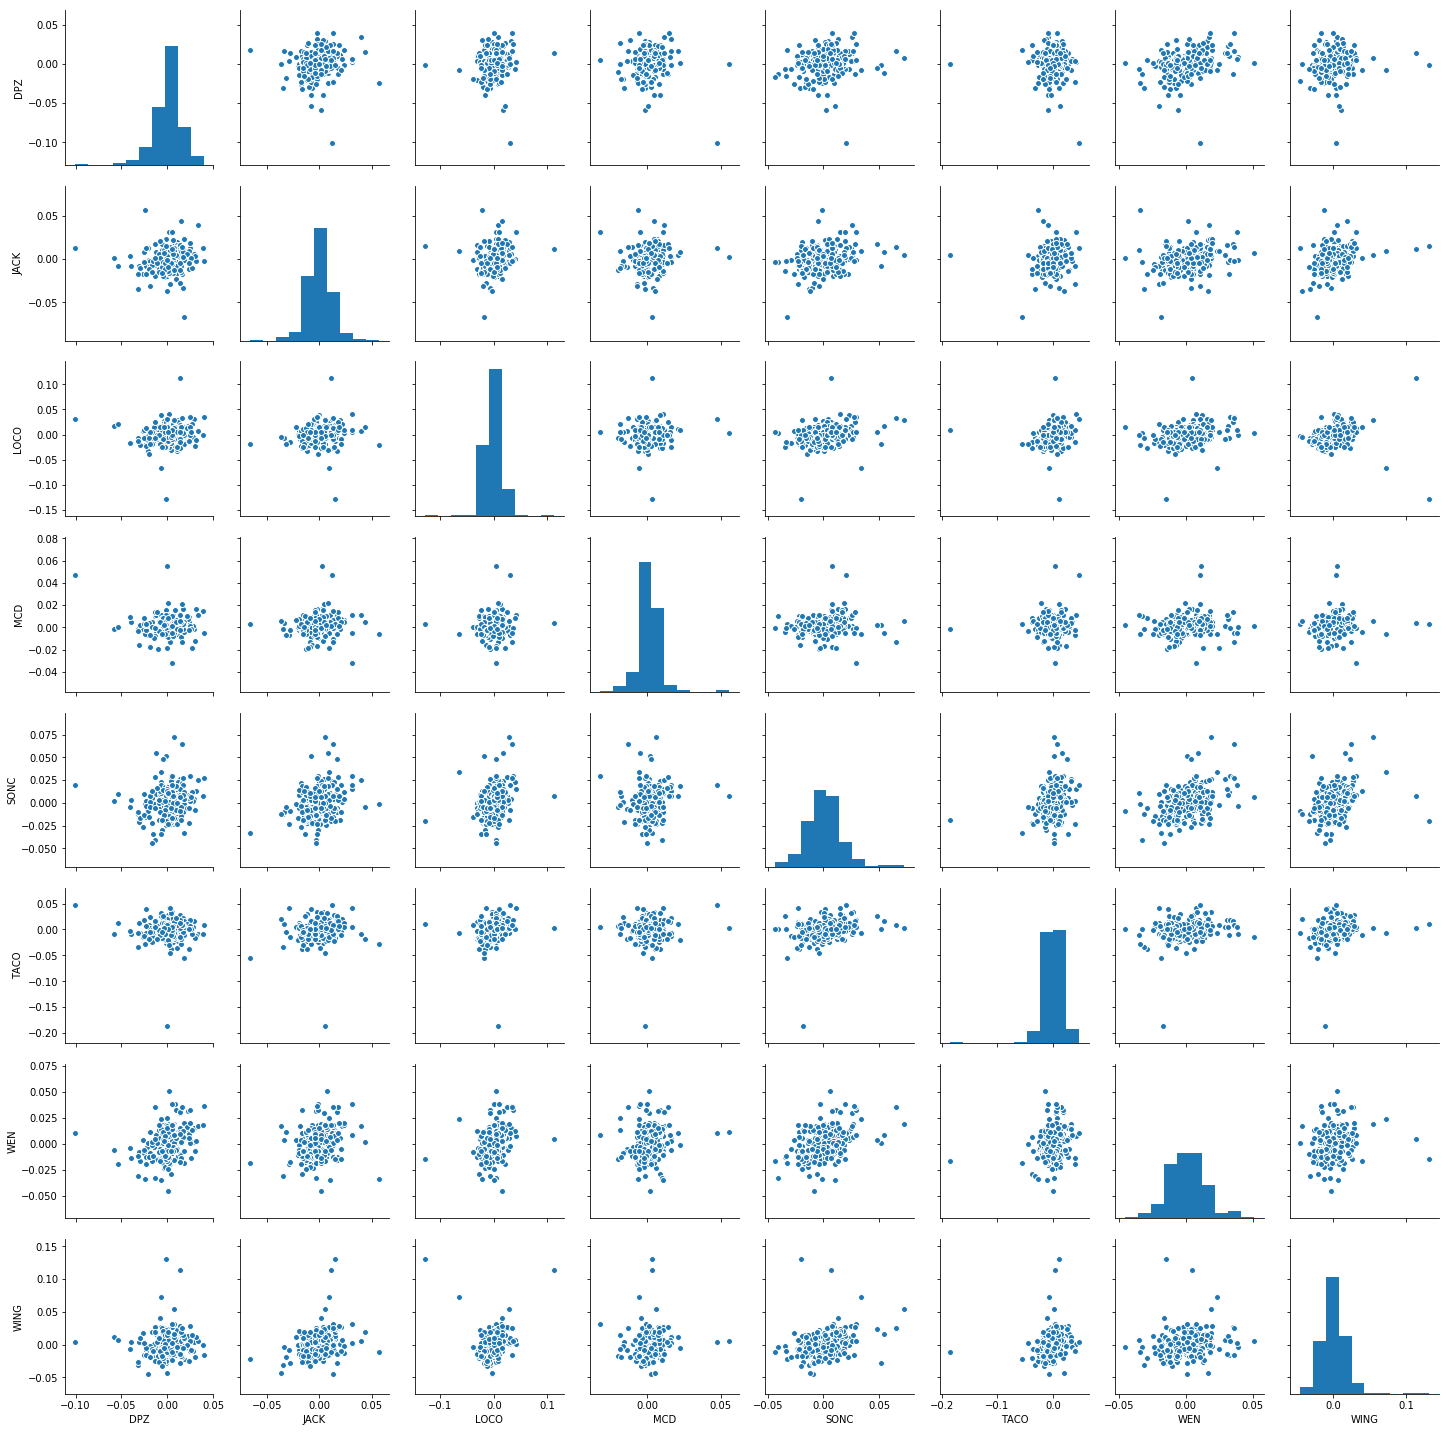

In [27]:
sns.pairplot(returns.dropna())

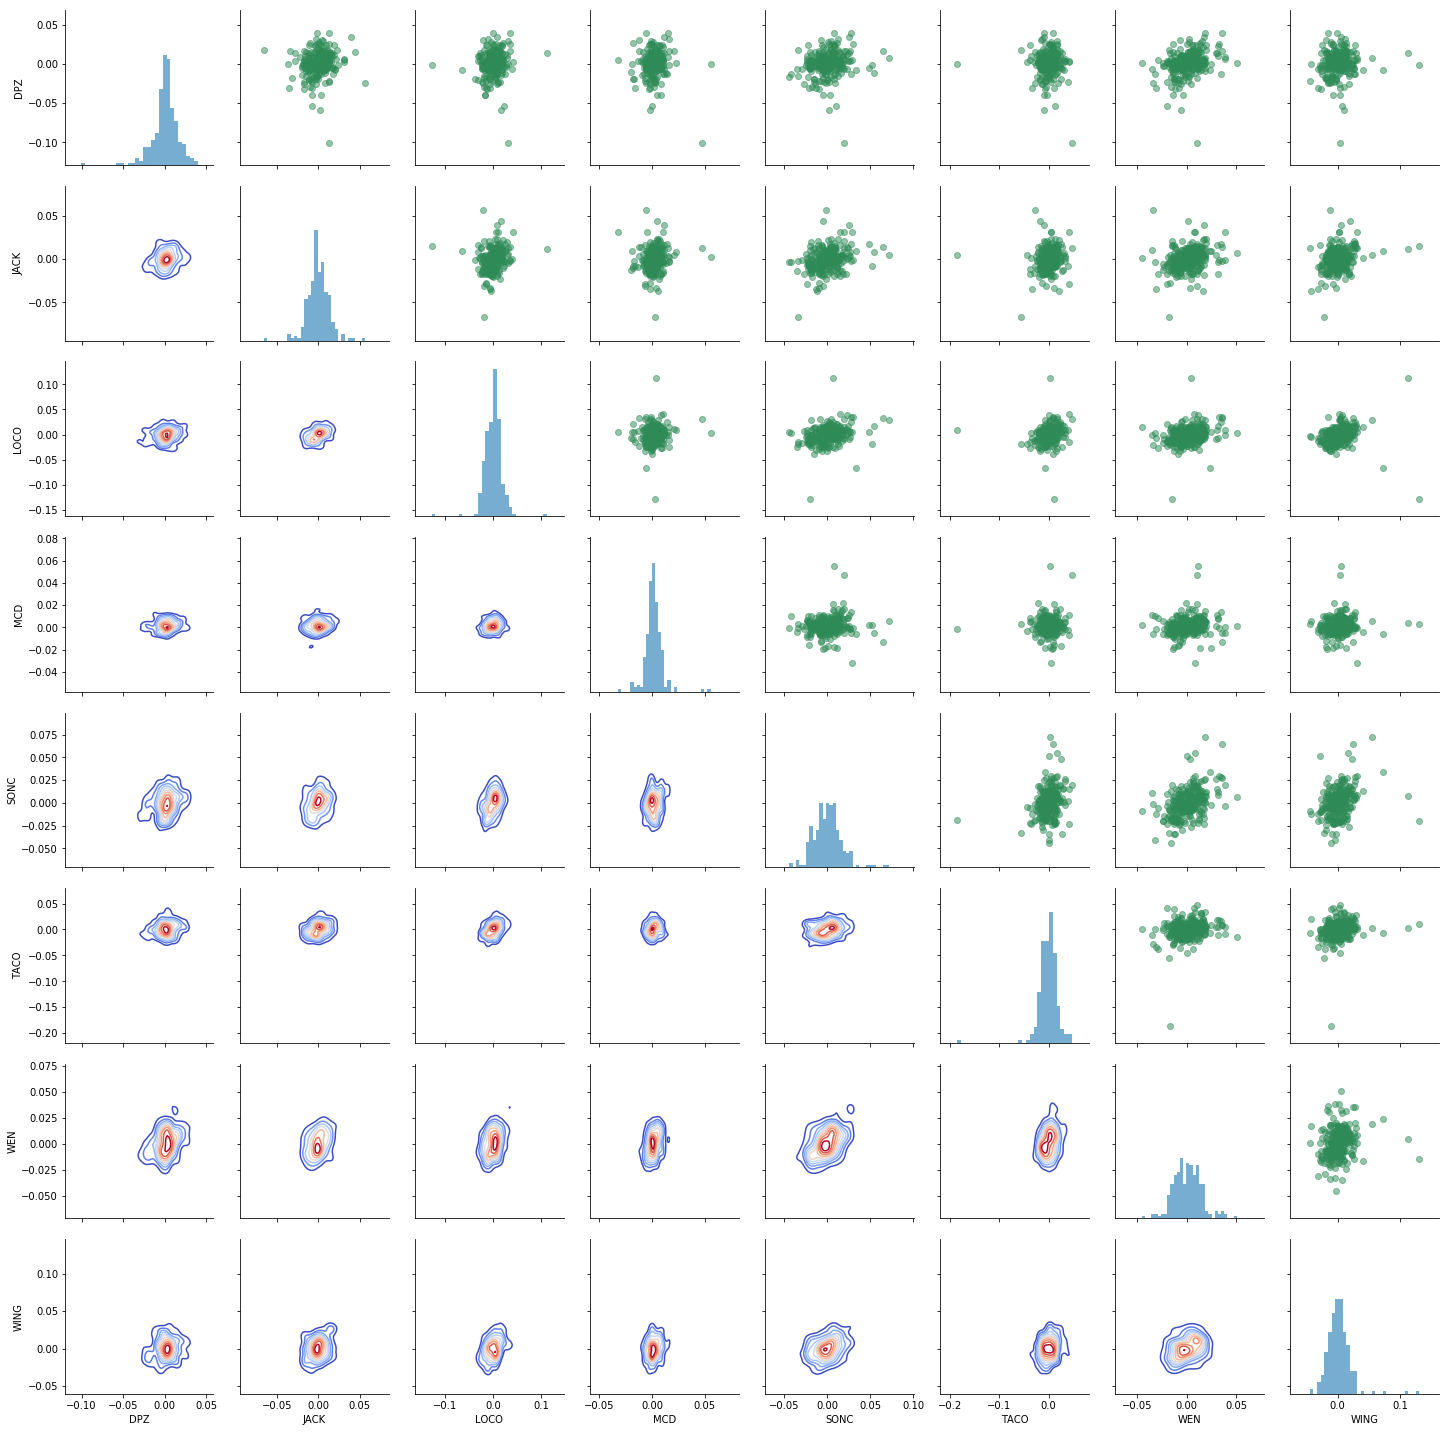

In [28]:
returns_fig = sns.PairGrid(returns.dropna())

# Using map_upper to specify upper triangle scatter plots.
returns_fig.map_upper(plt.scatter,color='seagreen',alpha=0.5)

# Using lower triangle for kde plot
returns_fig.map_lower(sns.kdeplot,cmap='coolwarm')

# diagonal will be a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30, alpha=0.6)

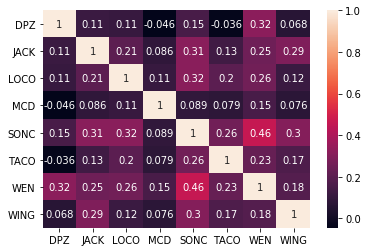

In [29]:
sns.heatmap(returns.corr(),annot=True)

In [30]:
rest_rets = returns.corr()
rest_rets

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000


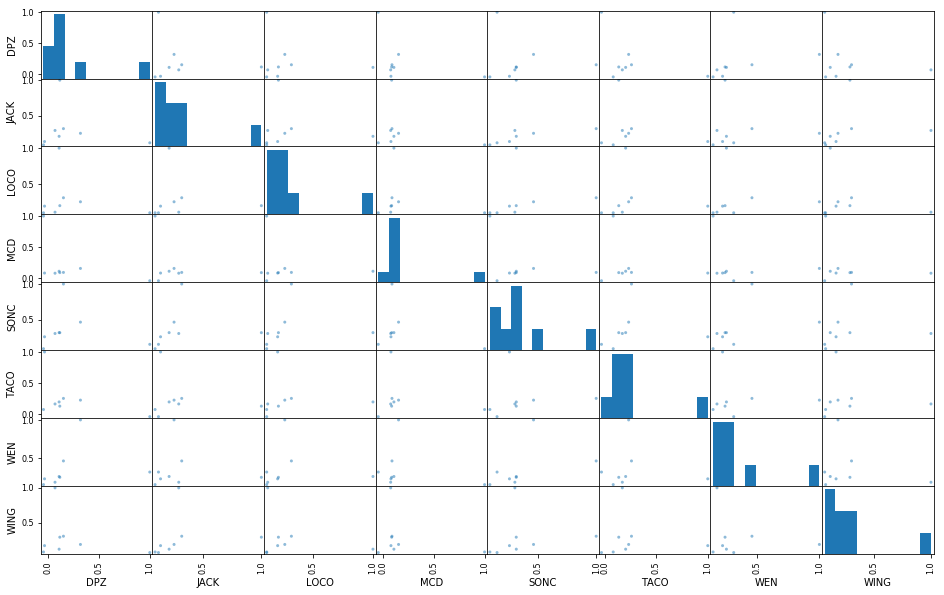

In [31]:
#Plot Scatter Matrix
scatter_matrix(rest_rets, figsize=(16,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C63941B278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C6396F1B38>]], dtype=object)

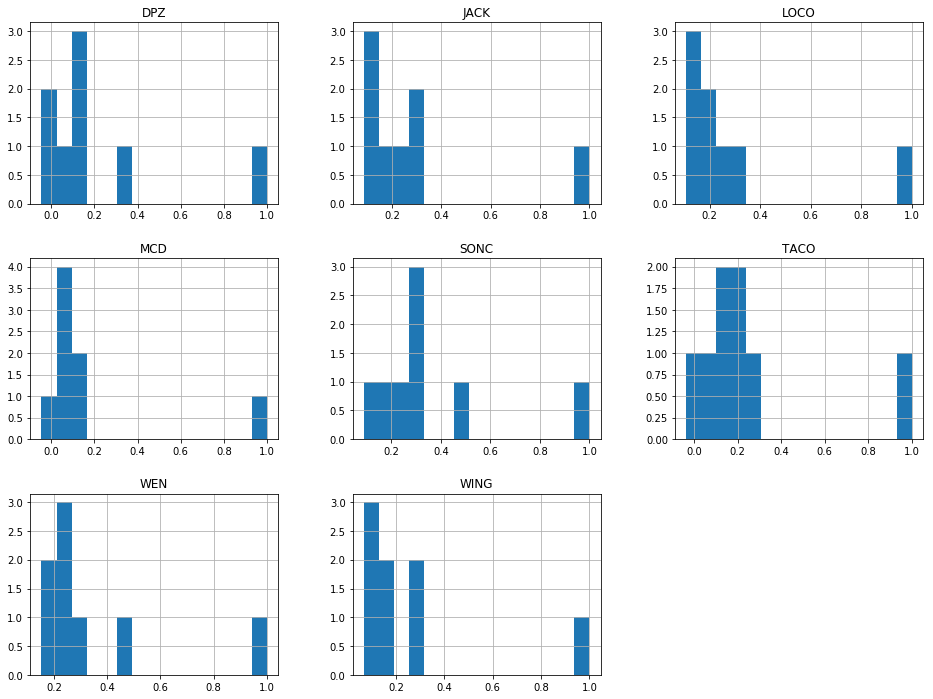

In [32]:
rest_rets.hist(bins=15, figsize=(16,12))

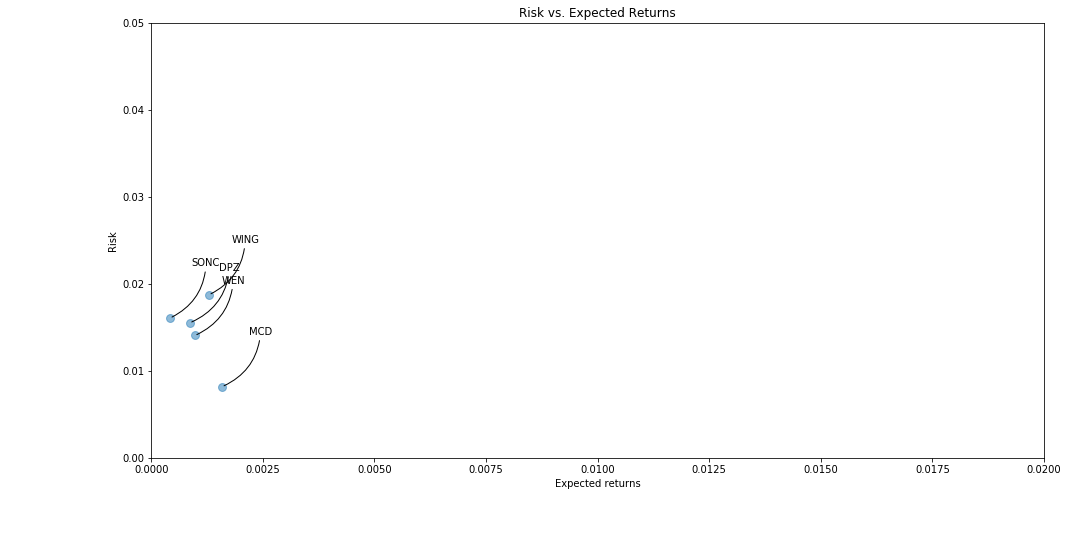

In [33]:
rets = returns.dropna()

area = np.pi*20
plt.figure(figsize=(16,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot
plt.ylim([0.0,0.05])
plt.xlim([0.0,0.02])

#Set the plot titles for x and y axis
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk vs. Expected Returns")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [34]:
rest_rets = returns.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

WING  WING    1.000000
WEN   WEN     1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
SONC  SONC    1.000000
TACO  TACO    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
SONC  LOCO    0.315284
LOCO  SONC    0.315284
SONC  JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
WEN   LOCO    0.259760
LOCO  WEN     0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
JACK  WEN     0.248829
WEN   JACK    0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
JACK  LOCO    0.206319
                ...   
WING  TACO    0.167481
TACO  WING    0.167481
WEN   MCD     0.153505
MCD   WEN     0.153505
DPZ   SONC    0.150413
SONC  DPZ     0.150413
JACK  TACO    0.132596
TACO  JACK    0.132596
WING  LOCO    0.116480
LOCO  WING    0.116480
DPZ   JACK    0.114694
JACK  DPZ     0.114694
LOCO  DPZ  

In [35]:
# Normalized Returns Data
Normalized_Value = ((returns[:] - returns[:].min()) /(returns[:].max() - returns[:].min()))
Normalized_Value.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
Date,,,,,,,,
2017-01-04,0.924006,0.583417,0.665805,0.353150,0.412981,0.866578,0.633049,0.281290
2017-01-05,0.706677,0.475304,0.455832,0.387436,0.821130,0.803539,0.478207,0.094075
2017-01-06,0.747699,0.402782,0.421985,0.467285,0.323372,0.635614,0.173745,0.140396
2017-01-09,0.760596,0.662100,0.485240,0.335366,0.414417,0.727225,0.611627,0.306524
2017-01-10,0.796171,0.698622,0.652703,0.349461,0.213477,0.766513,0.524704,0.264317


In [36]:
Normalized_Value.corr()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000


In [37]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

WING  WING    1.000000
WEN   WEN     1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
SONC  SONC    1.000000
TACO  TACO    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
SONC  LOCO    0.315284
LOCO  SONC    0.315284
SONC  JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
WEN   LOCO    0.259760
LOCO  WEN     0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
JACK  WEN     0.248829
WEN   JACK    0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
JACK  LOCO    0.206319
                ...   
WING  TACO    0.167481
TACO  WING    0.167481
WEN   MCD     0.153505
MCD   WEN     0.153505
DPZ   SONC    0.150413
SONC  DPZ     0.150413
JACK  TACO    0.132596
TACO  JACK    0.132596
WING  LOCO    0.116480
LOCO  WING    0.116480
DPZ   JACK    0.114694
JACK  DPZ     0.114694
LOCO  DPZ  

In [38]:
stocks = ['DPS', 'KO', 'PEP', 'FIZZ']

In [39]:
relate_industry = pdr.get_data_yahoo(stocks, start, end)["Adj Close"]

[*********************100%***********************]  4 of 4 downloaded


In [40]:
relate_industry.head()

,DPS,FIZZ,KO,PEP
Date,,,,
2017-01-03,88.182144,50.074741,39.732391,99.315590
2017-01-04,88.599464,50.064899,39.589813,99.505379
2017-01-05,88.677109,49.297092,39.684860,99.372528
2017-01-06,88.250069,48.568661,39.675362,99.230171
2017-01-09,87.871574,46.964142,39.276134,98.186234


In [41]:
relate_industry.describe()

,DPS,FIZZ,KO,PEP
count,251.000000,251.000000,251.000000,251.000000
mean,90.076417,90.338195,42.798375,108.599787
std,2.916272,21.247697,2.107819,4.749604
min,83.538315,45.280876,38.439663,96.373604
25%,88.210240,82.391502,40.835841,106.672882
50%,89.715393,94.389999,43.574440,109.084488
75%,91.649166,105.625000,44.567224,112.171658
max,96.584373,126.400002,46.221004,116.988831


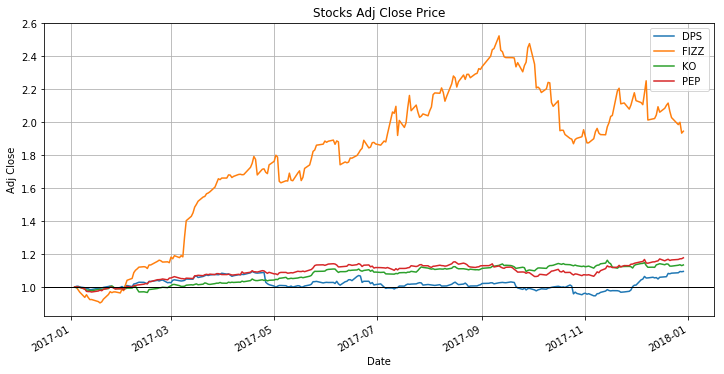

In [42]:
#for stock in stocks:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = relate_industry.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()

In [43]:
corr_drinks = relate_industry.corr()
corr_drinks

,DPS,FIZZ,KO,PEP
DPS,1.000000,-0.081569,-0.199423,0.246290
FIZZ,-0.081569,1.000000,0.890800,0.824940
KO,-0.199423,0.890800,1.000000,0.820491
PEP,0.246290,0.824940,0.820491,1.000000


In [44]:
DPS = data
DPS = DPS.assign(DPS = relate_industry['DPS'].values)
DPS.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,DPS
Date,,,,,,,,,
2017-01-03,156.133087,105.223282,12.70,114.436089,25.054655,14.32,12.969169,27.345259,88.182144
2017-01-04,160.697998,105.786285,13.10,114.302147,25.160292,14.55,13.172114,27.465435,88.599464
2017-01-05,160.481064,104.941780,12.85,114.512611,26.456715,14.57,13.181778,26.679659,88.677109
2017-01-06,161.190964,103.165413,12.50,115.526672,26.293459,14.02,12.804880,26.134230,88.250069
2017-01-09,162.196594,104.718521,12.35,115.210976,26.408697,13.79,12.978832,26.365341,87.871574


In [45]:
DPS_rets = DPS.pct_change().dropna()
DPS_rets.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,DPS
Date,,,,,,,,,
2017-01-04,0.029237,0.005351,0.031496,-0.001170,0.004216,0.016061,0.015648,0.004395,0.004732
2017-01-05,-0.001350,-0.007983,-0.019084,0.001841,0.051527,0.001375,0.000734,-0.028610,0.000876
2017-01-06,0.004424,-0.016927,-0.027237,0.008855,-0.006171,-0.037749,-0.028592,-0.020444,-0.004816
2017-01-09,0.006239,0.015055,-0.012000,-0.002733,0.004383,-0.016405,0.013585,0.008843,-0.004289
2017-01-10,0.011246,0.019559,0.028340,-0.001495,-0.018909,-0.007252,0.005212,0.001403,-0.005081


In [46]:
DPS_rets.corr()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,DPS
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675,0.098930
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179,0.087516
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480,0.050721
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061,0.047044
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121,0.098784
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481,0.047556
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537,0.120604
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000,0.104553
DPS,0.098930,0.087516,0.050721,0.047044,0.098784,0.047556,0.120604,0.104553,1.000000


In [47]:
DPS_rets = DPS_rets.corr()
pair_value_1 = DPS_rets.abs().unstack()
pair_value_1.sort_values(ascending = False)

DPS   DPS     1.000000
WING  WING    1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
TACO  TACO    1.000000
WEN   WEN     1.000000
SONC  SONC    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
LOCO  SONC    0.315284
SONC  LOCO    0.315284
      JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
LOCO  WEN     0.259760
WEN   LOCO    0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
WEN   JACK    0.248829
JACK  WEN     0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
                ...   
      MCD     0.107802
MCD   LOCO    0.107802
DPS   WING    0.104553
WING  DPS     0.104553
DPS   DPZ     0.098930
DPZ   DPS     0.098930
SONC  DPS     0.098784
DPS   SONC    0.098784
SONC  MCD     0.088901
MCD   SONC    0.088901
JACK  DPS     0.087516
DPS   JACK    0.087516
JACK  MCD  

In [48]:
FIZZ = data
FIZZ = FIZZ.join(relate_industry['FIZZ'])
FIZZ.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,FIZZ
Date,,,,,,,,,
2017-01-03,156.133087,105.223282,12.70,114.436089,25.054655,14.32,12.969169,27.345259,50.074741
2017-01-04,160.697998,105.786285,13.10,114.302147,25.160292,14.55,13.172114,27.465435,50.064899
2017-01-05,160.481064,104.941780,12.85,114.512611,26.456715,14.57,13.181778,26.679659,49.297092
2017-01-06,161.190964,103.165413,12.50,115.526672,26.293459,14.02,12.804880,26.134230,48.568661
2017-01-09,162.196594,104.718521,12.35,115.210976,26.408697,13.79,12.978832,26.365341,46.964142


In [49]:
FIZZ_rets = FIZZ.pct_change().dropna()
FIZZ_rets.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,FIZZ
Date,,,,,,,,,
2017-01-04,0.029237,0.005351,0.031496,-0.001170,0.004216,0.016061,0.015648,0.004395,-0.000197
2017-01-05,-0.001350,-0.007983,-0.019084,0.001841,0.051527,0.001375,0.000734,-0.028610,-0.015336
2017-01-06,0.004424,-0.016927,-0.027237,0.008855,-0.006171,-0.037749,-0.028592,-0.020444,-0.014776
2017-01-09,0.006239,0.015055,-0.012000,-0.002733,0.004383,-0.016405,0.013585,0.008843,-0.033036
2017-01-10,0.011246,0.019559,0.028340,-0.001495,-0.018909,-0.007252,0.005212,0.001403,0.016978


In [50]:
FIZZ_rets.corr()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,FIZZ
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675,0.086845
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179,-0.066345
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480,-0.088123
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061,0.055504
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121,-0.062416
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481,0.006355
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537,0.059568
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000,-0.009856
FIZZ,0.086845,-0.066345,-0.088123,0.055504,-0.062416,0.006355,0.059568,-0.009856,1.000000


In [51]:
FIZZ_rets = FIZZ_rets.corr()
pair_value_2 = FIZZ_rets.abs().unstack()
pair_value_2.sort_values(ascending = False)

FIZZ  FIZZ    1.000000
WING  WING    1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
TACO  TACO    1.000000
WEN   WEN     1.000000
SONC  SONC    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
LOCO  SONC    0.315284
SONC  LOCO    0.315284
      JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
LOCO  WEN     0.259760
WEN   LOCO    0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
WEN   JACK    0.248829
JACK  WEN     0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
                ...   
SONC  MCD     0.088901
MCD   SONC    0.088901
FIZZ  LOCO    0.088123
LOCO  FIZZ    0.088123
DPZ   FIZZ    0.086845
FIZZ  DPZ     0.086845
MCD   JACK    0.085592
JACK  MCD     0.085592
TACO  MCD     0.078713
MCD   TACO    0.078713
      WING    0.076061
WING  MCD     0.076061
      DPZ  

In [52]:
KO = pd.concat([data, relate_industry['KO']], axis=1)
KO.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,KO
Date,,,,,,,,,
2017-01-03,156.133087,105.223282,12.70,114.436089,25.054655,14.32,12.969169,27.345259,39.732391
2017-01-04,160.697998,105.786285,13.10,114.302147,25.160292,14.55,13.172114,27.465435,39.589813
2017-01-05,160.481064,104.941780,12.85,114.512611,26.456715,14.57,13.181778,26.679659,39.684860
2017-01-06,161.190964,103.165413,12.50,115.526672,26.293459,14.02,12.804880,26.134230,39.675362
2017-01-09,162.196594,104.718521,12.35,115.210976,26.408697,13.79,12.978832,26.365341,39.276134


In [53]:
KO_rets = KO.pct_change().dropna()
KO_rets.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,KO
Date,,,,,,,,,
2017-01-04,0.029237,0.005351,0.031496,-0.001170,0.004216,0.016061,0.015648,0.004395,-0.003588
2017-01-05,-0.001350,-0.007983,-0.019084,0.001841,0.051527,0.001375,0.000734,-0.028610,0.002401
2017-01-06,0.004424,-0.016927,-0.027237,0.008855,-0.006171,-0.037749,-0.028592,-0.020444,-0.000239
2017-01-09,0.006239,0.015055,-0.012000,-0.002733,0.004383,-0.016405,0.013585,0.008843,-0.010062
2017-01-10,0.011246,0.019559,0.028340,-0.001495,-0.018909,-0.007252,0.005212,0.001403,-0.006776


In [54]:
KO_rets.corr()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,KO
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675,-0.013292
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179,0.046562
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480,-0.021635
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061,0.109875
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121,0.015634
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481,-0.028030
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537,-0.029721
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000,0.026134
KO,-0.013292,0.046562,-0.021635,0.109875,0.015634,-0.028030,-0.029721,0.026134,1.000000


In [55]:
KO_rets = KO_rets.corr()
pair_value_3 = KO_rets.abs().unstack()
pair_value_3.sort_values(ascending = False)

KO    KO      1.000000
WING  WING    1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
TACO  TACO    1.000000
WEN   WEN     1.000000
SONC  SONC    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
LOCO  SONC    0.315284
SONC  LOCO    0.315284
      JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
LOCO  WEN     0.259760
WEN   LOCO    0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
WEN   JACK    0.248829
JACK  WEN     0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
                ...   
      MCD     0.107802
MCD   LOCO    0.107802
SONC  MCD     0.088901
MCD   SONC    0.088901
      JACK    0.085592
JACK  MCD     0.085592
MCD   TACO    0.078713
TACO  MCD     0.078713
MCD   WING    0.076061
WING  MCD     0.076061
DPZ   WING    0.067675
WING  DPZ     0.067675
KO    JACK 

In [56]:
PEP = pd.concat([data, relate_industry['PEP']], axis=1)
PEP.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,PEP
Date,,,,,,,,,
2017-01-03,156.133087,105.223282,12.70,114.436089,25.054655,14.32,12.969169,27.345259,99.315590
2017-01-04,160.697998,105.786285,13.10,114.302147,25.160292,14.55,13.172114,27.465435,99.505379
2017-01-05,160.481064,104.941780,12.85,114.512611,26.456715,14.57,13.181778,26.679659,99.372528
2017-01-06,161.190964,103.165413,12.50,115.526672,26.293459,14.02,12.804880,26.134230,99.230171
2017-01-09,162.196594,104.718521,12.35,115.210976,26.408697,13.79,12.978832,26.365341,98.186234


In [57]:
PEP_rets = PEP.pct_change().dropna()
PEP_rets.head()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,PEP
Date,,,,,,,,,
2017-01-04,0.029237,0.005351,0.031496,-0.001170,0.004216,0.016061,0.015648,0.004395,0.001911
2017-01-05,-0.001350,-0.007983,-0.019084,0.001841,0.051527,0.001375,0.000734,-0.028610,-0.001335
2017-01-06,0.004424,-0.016927,-0.027237,0.008855,-0.006171,-0.037749,-0.028592,-0.020444,-0.001433
2017-01-09,0.006239,0.015055,-0.012000,-0.002733,0.004383,-0.016405,0.013585,0.008843,-0.010520
2017-01-10,0.011246,0.019559,0.028340,-0.001495,-0.018909,-0.007252,0.005212,0.001403,-0.014402


In [58]:
PEP_rets.corr()

,DPZ,JACK,LOCO,MCD,SONC,TACO,WEN,WING,PEP
DPZ,1.000000,0.114694,0.107869,-0.045950,0.150413,-0.035613,0.317748,0.067675,0.063583
JACK,0.114694,1.000000,0.206319,0.085592,0.314804,0.132596,0.248829,0.289179,0.039751
LOCO,0.107869,0.206319,1.000000,0.107802,0.315284,0.199848,0.259760,0.116480,0.011152
MCD,-0.045950,0.085592,0.107802,1.000000,0.088901,0.078713,0.153505,0.076061,0.135251
SONC,0.150413,0.314804,0.315284,0.088901,1.000000,0.256698,0.463075,0.303121,0.048310
TACO,-0.035613,0.132596,0.199848,0.078713,0.256698,1.000000,0.228999,0.167481,0.049349
WEN,0.317748,0.248829,0.259760,0.153505,0.463075,0.228999,1.000000,0.184537,0.069176
WING,0.067675,0.289179,0.116480,0.076061,0.303121,0.167481,0.184537,1.000000,0.089813
PEP,0.063583,0.039751,0.011152,0.135251,0.048310,0.049349,0.069176,0.089813,1.000000


In [59]:
PEP_rets = PEP_rets.corr()
pair_value_4 = PEP_rets.abs().unstack()
pair_value_4.sort_values(ascending = False)

PEP   PEP     1.000000
WING  WING    1.000000
JACK  JACK    1.000000
LOCO  LOCO    1.000000
MCD   MCD     1.000000
TACO  TACO    1.000000
WEN   WEN     1.000000
SONC  SONC    1.000000
DPZ   DPZ     1.000000
WEN   SONC    0.463075
SONC  WEN     0.463075
DPZ   WEN     0.317748
WEN   DPZ     0.317748
LOCO  SONC    0.315284
SONC  LOCO    0.315284
      JACK    0.314804
JACK  SONC    0.314804
SONC  WING    0.303121
WING  SONC    0.303121
      JACK    0.289179
JACK  WING    0.289179
LOCO  WEN     0.259760
WEN   LOCO    0.259760
TACO  SONC    0.256698
SONC  TACO    0.256698
WEN   JACK    0.248829
JACK  WEN     0.248829
TACO  WEN     0.228999
WEN   TACO    0.228999
LOCO  JACK    0.206319
                ...   
MCD   LOCO    0.107802
LOCO  MCD     0.107802
PEP   WING    0.089813
WING  PEP     0.089813
MCD   SONC    0.088901
SONC  MCD     0.088901
JACK  MCD     0.085592
MCD   JACK    0.085592
      TACO    0.078713
TACO  MCD     0.078713
MCD   WING    0.076061
WING  MCD     0.076061
WEN   PEP  

0.452421756228


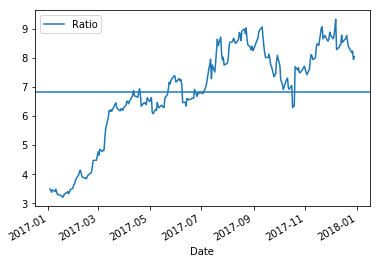

In [60]:
# Z-Value Rules Strategies
# To confirm when to enter and exit a position of pairs trading, mean spread and standard deviation of formation period should be calculated first, based on this data, calculate each day’s price spread and Z-Score.
# Entry: When the absolute value of Z-Score more than 1, enter a position by buying stock with lower price and selling the higher one.
# Exit: When the absolute value of Z-Score less than -1, exit the position by selling the stock with lower price and buying the higher one.
import statsmodels
from statsmodels.tsa.stattools import coint

S1 = relate_industry['FIZZ']
S2 = data['TACO']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

0.705661040395


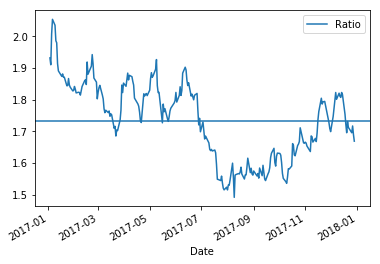

In [61]:
S1 = data['SONC']
S2 = data['WEN']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

In [62]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

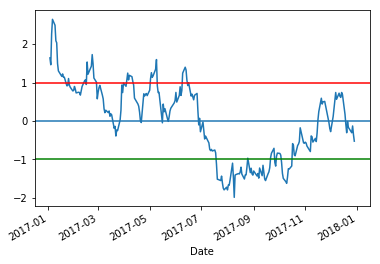

In [63]:
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [ ]:
zscore(ratios).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

In [64]:
ratios = relate_industry['FIZZ'] / data['TACO']
print(len(ratios))

251


In [65]:
ratios = data['SONC'] / data['WEN']
print(len(ratios))

251


In [66]:
# Pair Measurements
# Alpha	
# Beta		
# Volatility	
# Sharpe Ratios	
# Treynor Measure		
# Appraisal		
# M square	
# T square
# Jensen Measure
# Sortino Ratios
# Total Return
# Beta of market
# Beta of portfolio

In [67]:
# Market Data SPY
SPY = yf.download('SPY',start,end)['Adj Close']
SPY.head()

[*********************100%***********************]  1 of 1 downloaded


Date
2017-01-03    219.079453
2017-01-04    220.382797
2017-01-05    220.207718
2017-01-06    220.995575
2017-01-09    220.266083
Name: Adj Close, dtype: float64

In [68]:
SPY.rets = SPY.pct_change(1).dropna()

In [69]:
SPY_risk = SPY.std()
SPY_risk

12.00308376933539

In [70]:
rf = 0.018 # risk free rate
excess_returns_1 = relate_industry['FIZZ'].pct_change(1).dropna() - rf
excess_returns_1.head()

Date
2017-01-04   -0.018197
2017-01-05   -0.033336
2017-01-06   -0.032776
2017-01-09   -0.051036
2017-01-10   -0.001022
Name: FIZZ, dtype: float64

In [71]:
excess_returns_2 = data['TACO'].pct_change(1).dropna() - rf
excess_returns_3 = data['SONC'].pct_change(1).dropna() - rf
excess_returns_4 = data['WEN'].pct_change(1).dropna() - rf

In [131]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)
ret.head()

,FIZZ,TACO,SONC,WEN
Date,,,,
2017-01-04,-0.000197,0.016061,0.004216,0.015648
2017-01-05,-0.015336,0.001375,0.051527,0.000734
2017-01-06,-0.014776,-0.037749,-0.006171,-0.028592
2017-01-09,-0.033036,-0.016405,0.004383,0.013585
2017-01-10,0.016978,-0.007252,-0.018909,0.005212


In [73]:
excess_returns = pd.concat([excess_returns_1, excess_returns_2, excess_returns_3, excess_returns_4],axis=1)
excess_returns.head()

,FIZZ,TACO,SONC,WEN
Date,,,,
2017-01-04,-0.018197,-0.001939,-0.013784,-0.002352
2017-01-05,-0.033336,-0.016625,0.033527,-0.017266
2017-01-06,-0.032776,-0.055749,-0.024171,-0.046592
2017-01-09,-0.051036,-0.034405,-0.013617,-0.004415
2017-01-10,-0.001022,-0.025252,-0.036909,-0.012788


In [74]:
excess_returns.mean()

FIZZ   -0.015054
TACO   -0.018472
SONC   -0.017574
WEN    -0.017018
dtype: float64

In [75]:
excess_returns.std()

FIZZ    0.023557
TACO    0.019280
SONC    0.016079
WEN     0.014068
dtype: float64

In [76]:
sharpe_ratio = excess_returns.mean()/excess_returns.std()
print('Sharpe Ratio:')
sharpe_ratio

Sharpe Ratio:


FIZZ   -0.639064
TACO   -0.958080
SONC   -1.092976
WEN    -1.209724
dtype: float64

In [77]:
from scipy import stats

beta, alpha, r_value, p_value, std_err = stats.linregress(relate_industry['FIZZ'].pct_change(1).dropna(), SPY.rets)
print("FIZZ and SPY")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

FIZZ and SPY
Beta: 			 0.032692
Alpha: 			 0.000668
R-Squared: 		 0.181872
p-value: 		 0.003910
Standard Error: 	 0.011224


In [78]:
beta, alpha, r_value, p_value, std_err = stats.linregress(data['TACO'].pct_change(1).dropna(), SPY.rets)
print("TACO and SPY")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

TACO and SPY
Beta: 			 0.039957
Alpha: 			 0.000783
R-Squared: 		 0.181933
p-value: 		 0.003898
Standard Error: 	 0.013713


In [79]:
beta, alpha, r_value, p_value, std_err = stats.linregress(data['SONC'].pct_change(1).dropna(), SPY.rets)
print("SONC and SPY")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

SONC and SPY
Beta: 			 0.071605
Alpha: 			 0.000734
R-Squared: 		 0.271895
p-value: 		 0.000013
Standard Error: 	 0.016093


In [80]:
beta, alpha, r_value, p_value, std_err = stats.linregress(data['WEN'].pct_change(1).dropna(), SPY.rets)
print("WEN and SPY")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

WEN and SPY
Beta: 			 0.123758
Alpha: 			 0.000643
R-Squared: 		 0.411162
p-value: 		 0.000000
Standard Error: 	 0.017423


In [81]:
beta, alpha, r_value, p_value, std_err = stats.linregress(relate_industry['FIZZ'].pct_change(1).dropna(), data['TACO'].pct_change(1).dropna())
print("FIZZ and TACO")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

FIZZ and TACO
Beta: 			 0.005201
Alpha: 			-0.000487
R-Squared: 		 0.006355
p-value: 		 0.920365
Standard Error: 	 0.051971


In [82]:
beta, alpha, r_value, p_value, std_err = stats.linregress(data['SONC'].pct_change(1).dropna(), data['WEN'].pct_change(1).dropna())
print("SONC and WEN")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

SONC and WEN
Beta: 			 0.405163
Alpha: 			 0.000809
R-Squared: 		 0.463075
p-value: 		 0.000000
Standard Error: 	 0.049243


In [83]:
rf = 0.018
mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
m = np.matrix([ret['WEN'], SPY.rets])
beta = np.cov(m)[0][1] / np.std(SPY.rets)
er = rf + beta*(mrk_rate_ret-rf)
tr = (er - rf) / beta
print('Treynor Ratio: ', tr)

Treynor Ratio:  -1.65179587378


In [84]:
# Beta
print("Beta:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    print(ret[column].name,beta)

Beta:
FIZZ 0.00429292208976
TACO 0.00351474002374
SONC 0.00438048968516
WEN 0.00579579645188


In [85]:
# Alpha
print("Alpha:")
for column in ret:
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    alpha = np.mean(ret[column]) - beta * np.mean(SPY.rets)
    print(ret[column].name, alpha)

Alpha:
FIZZ 0.00294242315751
TACO -0.000474669048799
SONC 0.000423021347473
WEN 0.000977256390184


In [86]:
# Unsystematic Risk or Total Risk
Close = pd.concat([relate_industry['FIZZ'], data['TACO'], data['SONC'], data['WEN']], axis=1)
# Close = AdjClose.applymap(float)
Stock_risk = Close.std()
Unsystematic_risk = Stock_risk - beta*SPY_risk
print('Unsystematic Risk:')
print(Unsystematic_risk)

Unsystematic Risk:
FIZZ    21.178130
TACO     0.903511
SONC     1.682423
WEN      0.886908
dtype: float64


In [87]:
# Treynor Ratio
print("Treynor Ratio:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    tr = (er - rf) / beta
    print(ret[column].name,tr)

Treynor Ratio:
FIZZ -1.65179587378
TACO -1.65179587378
SONC -1.65179587378
WEN -1.65179587378


In [88]:
# Modigliani Ratio, M2
print("Modigliani Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    np_rf = np.empty(len(ret))
    np_rf.fill(rf)
    rdiff = ret[column] - np_rf
    bdiff = SPY.rets - np_rf
    mr = (er - rf) * np.std(rdiff) / np.std(bdiff) + rf
    print(ret[column].name,mr)

Modigliani Ratio:
FIZZ -0.0214488043924
TACO -0.00843439573472
SONC -0.00947503066558
WEN -0.0138059078363


In [89]:
print("Information Ratio:")
for column in ret:
    diff = ret[column] - SPY.rets
    ir = np.mean(diff) / np.std(diff)
    print(ret[column].name, ir)

Information Ratio:
FIZZ 0.0943539543431172
TACO -0.06530184581164493
SONC -0.02189382146988838
WEN 0.016850157738546315


In [90]:
print('Omega Ratio:')
for column in ret:
    annual_return_threshhold = 0.0
    returns = ret[column]
    daily_return_thresh = pow(1 + annual_return_threshhold, 1 / 252) - 1

    returns_less_thresh = returns - daily_return_thresh

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    if denom > 0.0:
         omega_ratio = numer / denom
    else:
        print('none')
    print(ret[column].name, omega_ratio)

Omega Ratio:
FIZZ 1.446551739669144
TACO 0.9273885187410763
SONC 1.0738465468702205
WEN 1.1952659485877963


In [91]:
print('Sortino Ratio:')

for column in ret:
    returns = ret[column]
    numer = pow((1 + returns.mean()), 252) - 1
    annual_volatility = returns.std() * np.sqrt(252)
    denom = annual_volatility

    if denom > 0.0:
         sortino_ratio = numer / denom
    else:
        print('none')
    print(ret[column].name, sortino_ratio)

Sortino Ratio:
FIZZ 2.93755846397
TACO -0.36647073254
SONC 0.444302443031
WEN 1.25611257733


In [92]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

print("Calmar Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    max_dd = 1.0 - (ret[column] / np.maximum.accumulate(ret[column])).min()
    
    calmar_r = (er - rf) / max_dd
    print(ret[column].name, calmar_r)

Calmar Ratio:
FIZZ -0.00348049218034
TACO -0.00117483523457
SONC -0.00401896039492
WEN -0.00278806444436


In [93]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

print("Sterling Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    average_dd = 1.0 - (ret[column] / np.maximum.accumulate(ret[column])).mean()
    sterling_r = (er - rf) / average_dd
    
    print(ret[column].name, sterling_r)

Sterling Ratio:
FIZZ 0.0209499110485
TACO -0.00568401908389
SONC -0.00729925148088
WEN -0.00985960424356


In [94]:
# ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)
print("Appraisal Ratio:")
appraisal_ratio = alpha / Unsystematic_risk
print(appraisal_ratio)

Appraisal Ratio:
FIZZ    0.000046
TACO    0.001082
SONC    0.000581
WEN     0.001102
dtype: float64


In [95]:
print("Burke Ratio:")
for column in ret:
    returns = ret[column]
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([returns, SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    
    average_dd_squared = 1.0 - ((returns / np.maximum.accumulate(returns)).mean())**2
    round_average_dd = round(average_dd_squared,4)
    
    burke_r = (er - rf) /math.sqrt(abs(round_average_dd))
    print(ret[column].name, burke_r)

Burke Ratio:
FIZZ -0.00797046986352
TACO -0.0058070850214
SONC -0.00723603659796
WEN -0.00957730435271


In [96]:
# Ulcer Index 14 days
max14 = Close.rolling(window=14,min_periods=1).max()
drawdown_percent = 100*((Close-max14)/max14)
avg_sq = round(drawdown_percent * drawdown_percent, 2)
Ulcer = np.sqrt(avg_sq.rolling(window=14).mean())
Ulcer_index = Ulcer.dropna()
Ulcer_index.head()

,FIZZ,TACO,SONC,WEN
Date,,,,
2017-01-23,6.246885,3.671609,4.990849,1.934093
2017-01-24,6.289447,3.707329,5.351235,1.947893
2017-01-25,6.308554,3.708966,5.599617,1.963961
2017-01-26,6.295066,3.719255,5.863629,1.966324
2017-01-27,6.243625,3.696330,6.178245,1.826394


In [97]:
# Martin Ratio
print('Martin Ratio:')
rf = 0.018
annual_return = returns.mean() * 252
martin_ratio = (annual_return - rf) / Ulcer_index.sum()
print(martin_ratio)

Martin Ratio:
FIZZ    0.000221
TACO    0.000187
SONC    0.000230
WEN     0.000337
dtype: float64


In [98]:
# Pain Index
max14 = Close.rolling(window=14,min_periods=1).max()
drawdown = 100*((Close-max14)/max14)
pain = drawdown.rolling(window=14).mean()
pain_index = pain.dropna()
pain_index.head()

,FIZZ,TACO,SONC,WEN
Date,,,,
2017-01-23,-5.415766,-3.166977,-3.668656,-1.400579
2017-01-24,-5.610980,-3.304246,-4.184601,-1.462289
2017-01-25,-5.740795,-3.333660,-4.625358,-1.529140
2017-01-26,-5.641420,-3.407501,-5.090293,-1.554852
2017-01-27,-5.436693,-3.384002,-5.568295,-1.412331


In [99]:
# Pain Ratio
print('Pain Ratio:')
rf = 0.018
annual_return = returns.mean() * 252
pain_ratio = (annual_return - rf) / pain_index.sum()
print(pain_ratio)

Pain Ratio:
FIZZ   -0.000268
TACO   -0.000220
SONC   -0.000268
WEN    -0.000396
dtype: float64


In [118]:
from scipy.stats import kurtosis, skew

In [117]:
print("Skewness:")
for column in ret:
    stock_skewness = skew(ret[column])
    print(ret[column].name, stock_skewness)

Skewness:
FIZZ -0.7325684685455911
TACO -3.519416059151729
SONC 0.7470784217636159
WEN 0.2080739453192888


In [116]:
print("Kurtosis:")
for column in ret:
    stock_kurtosis = kurtosis(ret[column])
    print(ret[column].name, stock_kurtosis)

Kurtosis:
FIZZ 4.937556802991785
TACO 32.98248606794644
SONC 2.5680664359600316
WEN 0.7969939168657239


In [121]:
# Adjusted Sharpe Ratio
print("Adjusted Sharpe Ratio:")
Adj_SR = sharpe_ratio * (1 + (stock_skewness / 6.0) * sharpe_ratio + (stock_kurtosis - 3) / 24.0 * sharpe_ratio**2)
print(Adj_SR)

Adjusted Sharpe Ratio:
FIZZ   -0.600943
TACO   -0.845522
SONC   -0.931699
WEN    -0.996470
dtype: float64


In [122]:
# Downside Risk
downside_risk = ret[ret < ret.mean()].std(skipna = True) * np.sqrt(252)
downside_risk

FIZZ    0.321113
TACO    0.296075
SONC    0.142148
WEN     0.129905
dtype: float64

In [123]:
# Upside Risk
upside_risk = ret[ret > ret.mean()].std(skipna = True) * np.sqrt(252)
upside_risk

FIZZ    0.233239
TACO    0.156328
SONC    0.194902
WEN     0.147310
dtype: float64

In [153]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

print("Bernado Ledoit Ratio:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    target = 0
    # ret = np.array(ret)
    threshold = 0.0
    order = 1

    threshold_array = np.empty(len(ret))
    threshold_array.fill(threshold)

    diff = ret[column] - threshold_array
    diff = diff.clip()
    hpm = sum(diff ** order) / len(ret)
    
    diff_1 = threshold_array - ret[column]
    diff_1 = diff.clip()
    lpm = sum(diff_1 ** order) / len(ret)
    
    gain_loss = hpm / lpm
    print(ret[column].name, gain_loss)

Bernado Ledoit Ratio:
FIZZ 1.0
TACO 1.0
SONC 1.0
WEN 1.0


In [155]:
print("Value at Risk(VaR):")
for column in ret:
    returns = ret[column]
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    VaR = abs(sorted_returns[index])
    print(ret[column].name, VaR)

Value at Risk(VaR):
FIZZ 0.105631964523
TACO 0.185834957765
SONC 0.0436540562882
WEN 0.0453276929912


In [161]:
print("Conditional VaR:")
for column in ret:
    returns = ret[column]
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    sum_var = sorted_returns[0]
    for i in range(0, index):
        sum_var += sorted_returns[i]
    CVaR = abs(sum_var / index)
    print(ret[column].name, CVaR)

Conditional VaR:
FIZZ inf
TACO inf
SONC inf
WEN inf


In [165]:
# Cumulative 
print("Cumulative:")
for column in ret:
    returns = ret[column]
    cum_ret = returns.cumsum()
    print(cum_ret.head())

Cumulative:
Date
2017-01-04   -0.000197
2017-01-05   -0.015533
2017-01-06   -0.030309
2017-01-09   -0.063345
2017-01-10   -0.046368
Name: FIZZ, dtype: float64
Date
2017-01-04    0.016061
2017-01-05    0.017436
2017-01-06   -0.020313
2017-01-09   -0.036718
2017-01-10   -0.043970
Name: TACO, dtype: float64
Date
2017-01-04    0.004216
2017-01-05    0.055743
2017-01-06    0.049572
2017-01-09    0.053955
2017-01-10    0.035046
Name: SONC, dtype: float64
Date
2017-01-04    0.015648
2017-01-05    0.016382
2017-01-06   -0.012210
2017-01-09    0.001374
2017-01-10    0.006587
Name: WEN, dtype: float64


In [186]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

cum_ret = ret.cumsum()
cum_ret.head()

,FIZZ,TACO,SONC,WEN
Date,,,,
2017-01-04,-0.000197,0.016061,0.004216,0.015648
2017-01-05,-0.015533,0.017436,0.055743,0.016382
2017-01-06,-0.030309,-0.020313,0.049572,-0.012210
2017-01-09,-0.063345,-0.036718,0.053955,0.001374
2017-01-10,-0.046368,-0.043970,0.035046,0.006587


In [203]:
ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)
avg_ret = mean(ret)
avg_ret

FIZZ    0.002946
TACO   -0.000472
SONC    0.000426
WEN     0.000982
dtype: float64

In [204]:
from numpy import where, mean

returns = avg_ret
avg_win = returns.where(returns > 0, 0)
print(avg_win)

FIZZ    0.002946
TACO    0.000000
SONC    0.000426
WEN     0.000982
dtype: float64


In [205]:
avg_loss = returns.where(returns <= 0, 0)
print(avg_loss)

FIZZ    0.000000
TACO   -0.000472
SONC    0.000000
WEN     0.000000
dtype: float64


In [ ]:
# Maximum Favorable Excursion

def cl(close, low):
    return (close - low)

def hc(high, close):
    return (high - close)

def mfe(high, low, close, pos=0):
    if pos == 1:
        return hc(high, close)
    else:
        return cl(close, low) 

def min_mfe(cumulative, mfe):
    return (mfe - cumulative).min()

In [ ]:
# Maximum Adverse Excursion
def cl(close, low):
    return (close - low)

def hc(high, close):
    return (high - close)

def mae(high, low, close, pos=0):
    if pos == 1:
        return cl(close, low)
    else:
return hc(high, close)

def max_mae(cumulative, mae):
    return (cumulative - mae).max()